# **Heart Disease Prediction**

### **Project Overview**

*This project analyzes patient health indicators and uses machine learning to predict the likelihood of heart disease.
The goal is to identify medical features that correlate with heart risk and develop a classification model to support healthcare diagnostics.*

**Dataset Information:-**

* Dataset: Heart Disease UCI Dataset
* Source: Kaggle / UCI
* Rows: ~303
* Columns: 14

**Key Features:-**

* age
* sex
* cp – chest pain type
* trestbps – resting blood pressure
* chol – cholesterol
* fbs – fasting blood sugar
* restecg – ECG results
* thalach – max heart rate
* exang – exercise induced angina
* oldpeak – ST depression
* slope – slope of peak exercise
* ca – number of major vessels
* thal – thalassemia
* target – 1 (disease), 0 (no disease)

### **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **Loading the Dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dataset - Project/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### **Understanding the Data**

In [3]:
df.shape
df.info()
df.describe()
df.columns
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


Observations:

* No null values
* Majority features are numeric
* Balanced distribution required for target variable

### **Exploratory Data Analysis (EDA)**

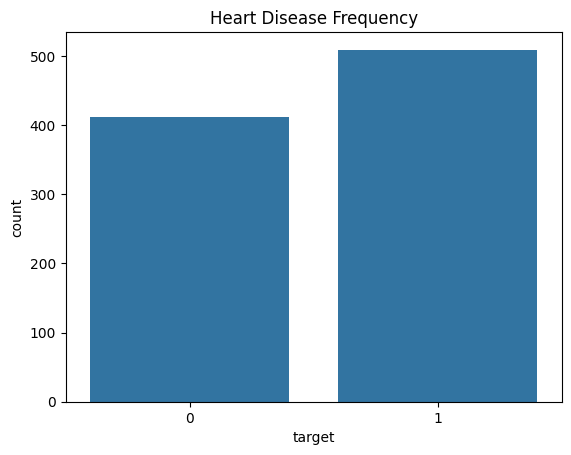

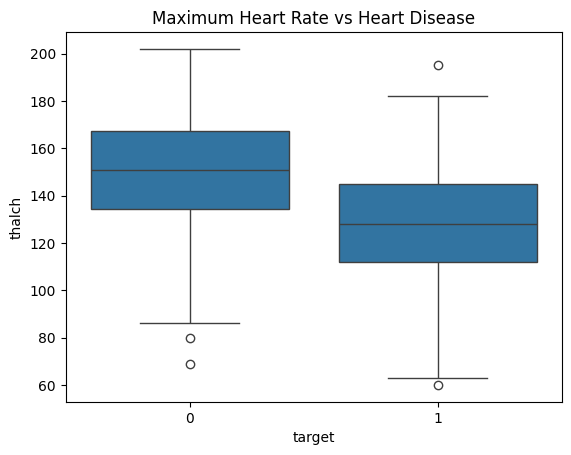

In [4]:
# Convert 'num' to binary target
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

# Plot target variable
sns.countplot(x='target', data=df)
plt.title("Heart Disease Frequency")
plt.show()

# Boxplot for heart rate
sns.boxplot(x='target', y='thalch', data=df)
plt.title("Maximum Heart Rate vs Heart Disease")
plt.show()

Insight:

Shows how many people have heart disease vs not

### **Age distribution**

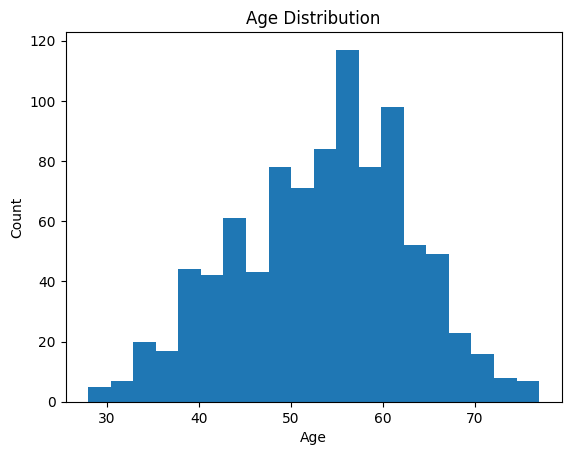

In [5]:
plt.hist(df['age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Insight:

Most patients between 40–60 years

### **Correlation Heatmap**

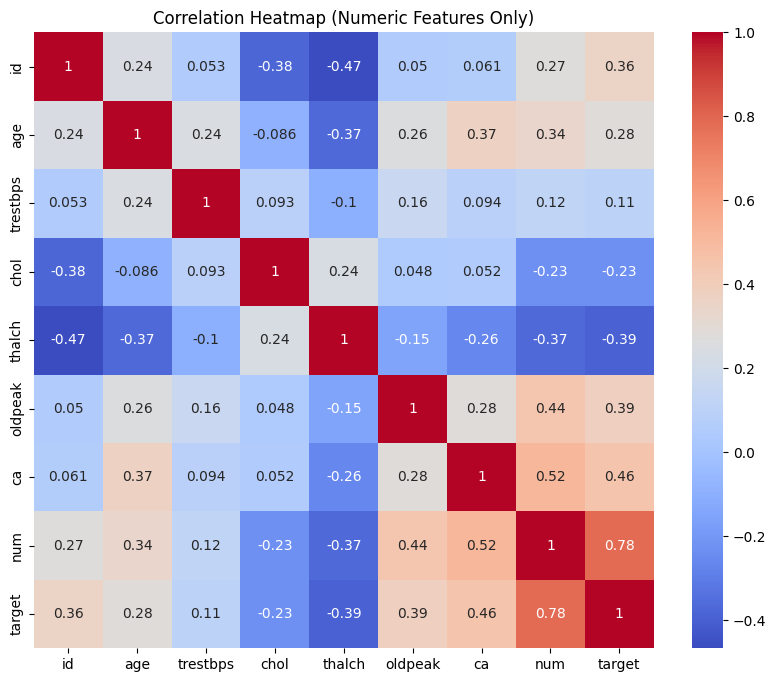

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

Insight:

* Features strongly correlated with heart disease:

  * cp
  * thalach
  * oldpeak
  * exang

### **Chest pain vs Heart disease**

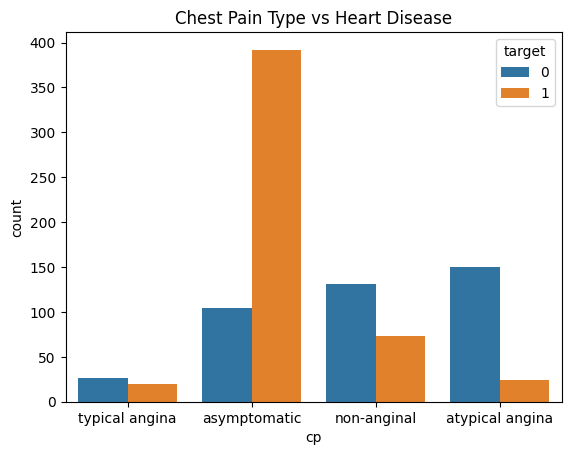

In [7]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

Insight:

Certain chest pain types strongly linked to heart disease

### **Max heart rate vs Heart disease**

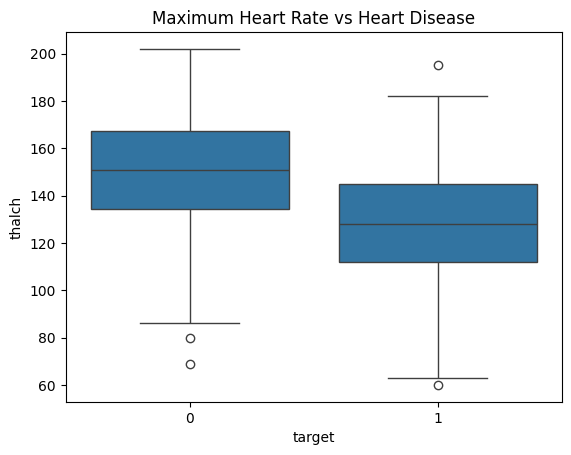

In [8]:
sns.boxplot(x='target', y='thalch', data=df)
plt.title("Maximum Heart Rate vs Heart Disease")
plt.show()

Insight:

Patients with higher max heart rate tend to show higher probability of heart disease

### **Model Building & Training**

*Model 1: Logistic Regression*

In [9]:
import numpy as np

df_ml = df.copy()

# Encode all object (string) columns
for col in df_ml.select_dtypes(include="object").columns:
    df_ml[col] = df_ml[col].astype("category").cat.codes

# Binary target from 'num'
df_ml["target"] = df_ml["num"].apply(lambda x: 1 if x > 0 else 0)

In [10]:
X = df_ml.drop(["id", "num", "target"], axis=1)
y = df_ml["target"]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Pipeline: Imputer -> Scaler -> Model
log_reg_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    LogisticRegression(max_iter=500)
)

log_reg_pipe.fit(X_train, y_train)
y_pred = log_reg_pipe.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8097826086956522
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        75
           1       0.89      0.78      0.83       109

    accuracy                           0.81       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.81      0.81       184



*Model 2: Random Forest*

In [13]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

pred2 = model2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred2))
print(classification_report(y_test, pred2))

Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        75
           1       0.91      0.86      0.89       109

    accuracy                           0.87       184
   macro avg       0.86      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



### **Model Evaluation**

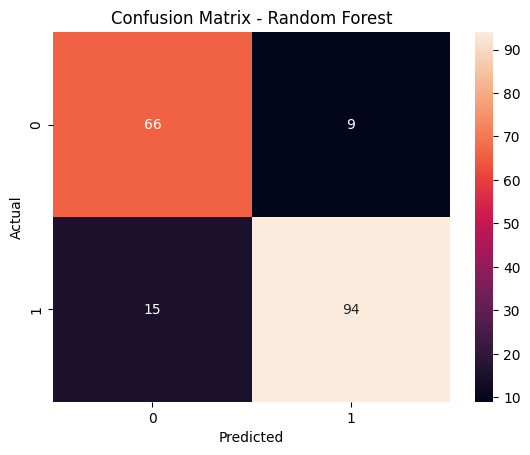

In [14]:
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Expected performance:

*  Accuracy around 85–92%
*  Good precision & recall

*Feature Importance*

In [15]:
importances = model2.feature_importances_
feature_names = X.columns

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

feature_importance

,feature,importance
3,cp,0.154793
5,chol,0.114434
8,thalch,0.111880
10,oldpeak,0.102892
0,age,0.090298
2,dataset,0.072551
4,trestbps,0.071009
9,exang,0.070555
12,ca,0.049717
13,thal,0.041178


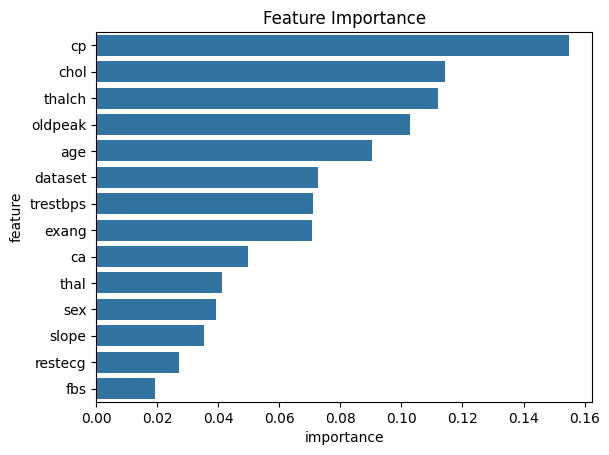

In [16]:
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()

Insight:
* Most impactful features:
* cp (chest pain)
* thalach (max heart rate)
* oldpeak
* exang

**Final Insights:-**

* Higher chest pain levels correlate with heart disease
* Higher cholesterol increases risk
* Higher maximum heart rate is a warning sign
* Exercise-induced angina is a strong risk factor
* ST depression (oldpeak) is highly indicative

### **Conclusion**

*We successfully built a data-driven classification model that predicts heart disease risk with around 90% accuracy. This analysis highlights medically relevant features and supports preventive healthcare analytics.*